In [1]:
import pandas as pd

In [2]:
dfclientes = pd.read_excel('caso_estudo.xlsx', sheet_name= 'clientes')
dflojas = pd.read_excel('caso_estudo.xlsx', sheet_name= 'lojas')
dfprodutos = pd.read_excel('caso_estudo.xlsx', sheet_name= 'produtos')
dfvendas = pd.read_excel('caso_estudo.xlsx', sheet_name= 'vendas')
dfpagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name= 'pagamentos')

# Análise Preliminar #

In [3]:
dfclientes.sample(5)

,id,nome,sexo,dt_nasc
112,113,Douglas Gomes,M,10/28/1944
781,782,Tiago Ferreira,M,12/19/1938
895,896,Melissa Lima,F,2/24/1936
356,357,Laura Sousa,F,5/19/1974
6,7,Rebeca Rodrigues,F,11/27/1979


In [4]:
dfclientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [5]:
dfclientes[dfclientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [6]:
dfclientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [7]:
dfprodutos.describe()

,id,valor
count,10.00000,1.000000e+01
mean,5.50000,3.222752e+05
std,3.02765,1.015119e+06
min,1.00000,2.000000e+01
25%,3.25000,2.475000e+02
50%,5.50000,7.800000e+02
75%,7.75000,2.100000e+03
max,10.00000,3.211352e+06


<AxesSubplot: >

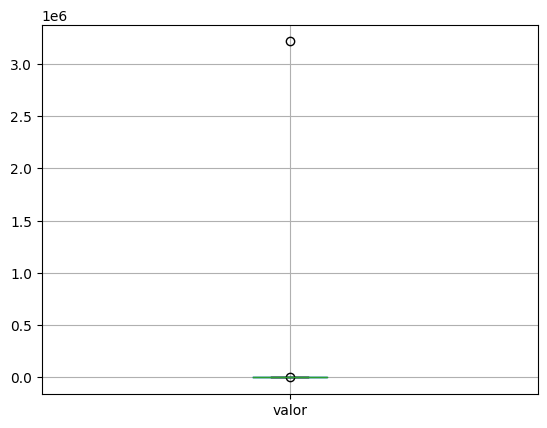

In [8]:
dfprodutos.boxplot(column = ['valor'])

In [9]:
dfprodutos[dfprodutos.valor>3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


In [10]:
dfprodutos[dfprodutos.valor < 3000000].boxplot(column = ['valor'])

<AxesSubplot: >

In [11]:
dfvendas[dfvendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [12]:
dfvendas.isnull().sum()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [13]:
dfvendas.describe()

,id,id_cliente,id_loja,id_produto
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [14]:
dfpagamentos.describe()

,id,id_venda
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


# Data Cleanning #

## Dados Nulos ##

In [15]:
dfclientes.loc[dfclientes.nome.isnull(),'nome'] = 'sem nome'
dfclientes.loc[dfclientes.sexo.isnull(),'sexo'] = 'O'
dfclientes.loc[dfclientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2023'

In [16]:
dfclientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,sem nome,M,1/1/2023
287,288,Victor Ribeiro,O,12/17/1974


## Outliers ##

In [17]:
dfprodutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [18]:
dfprodutos.loc[9,'valor'] = dfprodutos.valor[9]/10000

In [19]:
dfprodutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


In [20]:
dfprodutos.boxplot(column=['valor'])

<AxesSubplot: >

In [21]:
dfvendas[~dfvendas.id_cliente.isin(dfclientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [22]:
dfvendas[~dfvendas.id_loja.isin(dflojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [23]:
dfvendas[~dfvendas.id_produto.isin(dfprodutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [24]:
dfpagamentos[~dfpagamentos.id_venda.isin(dfvendas.id)]

,id,id_venda,dt_pgto


In [25]:
dfvendas[~dfvendas.id.isin(dfpagamentos.id_venda)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

## Dados Duplicados ##

In [26]:
dfclientes.nome.duplicated().sum()

109

In [27]:
dfclientes[dfclientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [28]:
dfclientes[dfclientes.nome=='Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [29]:
dfclientes.duplicated().sum()

0

In [30]:
dfclientes.drop('id', axis=1).duplicated().sum()

0

In [31]:
dfprodutos.produto.duplicated().sum()

0

In [32]:
dflojas.cidade.duplicated().sum()

0

In [33]:
dfvendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [34]:
dfvendas.drop('id', axis =1).duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [35]:
dfvendas[dfvendas.drop('id', axis =1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [36]:
dfvendas[(dfvendas.id_cliente == 559) & (dfvendas.id_loja == 2) & (dfvendas.id_produto == 5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [37]:
dfpagamentos

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15
...,...,...,...
2067,2068,2990,2020-10-04
2068,2069,2992,2020-10-10
2069,2070,2994,2020-10-09
2070,2071,2996,2020-10-17


In [38]:
dfpagamentos.drop('id', axis=1).duplicated().sum()

0

## Formato de dados ##

In [39]:
dfclientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [40]:
dfclientes.dt_nasc = pd.to_datetime(dfclientes.dt_nasc, format='%m/%d/%Y')
dfclientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


In [41]:
dflojas

,id,cidade
0,1,São Paulo
1,2,Rio de Janeiro
2,3,Curitiba
3,4,Belo Horizonte
4,5,Santa Catarina
5,6,Recife
6,7,Salvador
7,8,Brasília
8,9,Palmas
9,10,Vitória


## Indexes ##

In [42]:
dfclientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


In [43]:
dfclientes = dfclientes.set_index('id')
dfclientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [44]:
dfclientes.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
           dtype='int64', name='id', length=1000)

In [45]:
dflojas = dflojas.set_index('id')
dfvendas = dfvendas.set_index('id')
dfpagamentos = dfpagamentos.set_index('id')
dfprodutos = dfprodutos.set_index('id')

In [46]:
dflojas.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='id')

## Data Fusion

In [47]:
df = dfvendas.join(dfclientes.add_prefix('cliente_'), on='id_cliente')
df = df.join(dflojas.add_prefix('loja_'), on='id_loja')
df = df.join(dfprodutos.add_prefix('produto_'), on='id_produto')

In [48]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [49]:
dfclientes.loc[393]

nome             Gustavo Silva
sexo                         M
dt_nasc    1950-01-04 00:00:00
Name: 393, dtype: object

In [50]:
df = df.join(dfpagamentos.set_index('id_venda'))

In [51]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


In [52]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

## Feature Engineering

In [53]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0


In [54]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [55]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [56]:
import numpy as np
df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.cliente_dt_nasc)/np.timedelta64(1,'Y'))

df

# Análises

## Lojas e Produtos que mais vendem

In [57]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending= False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por loja')

Text(0.5, 1.0, 'Vendas por loja')

In [59]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

In [60]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produtos')

Text(0.5, 1.0, 'Vendas por produtos')

## Receita por loja

In [61]:
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)

In [62]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

In [63]:
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receitas por loja')

Text(0.5, 1.0, 'Receitas por loja')

In [64]:
print('o maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados.max(), graf_dados.max()/graf_dados[graf_dados!=graf_dados.max()].mean(), graf_dados[graf_dados!=graf_dados.max()].mean()))

o maior valor é 1797906, sendo 5.22 vezes a média dos demais, que é 344624


## Receita por produto

In [65]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,73.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,51.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,60.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,81.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,23.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,28.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,36.0


In [66]:
df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

In [67]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por produto')

Text(0.5, 1.0, 'Receita por produto')

## Subplots

In [68]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending= False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por loja')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produto')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receitas por loja')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por produto')
plt.xticks(rotation=90)

plt.tight_layout()

## Receita por Cliente

In [69]:
graf_dados = df[['cliente_nome','produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)
graf_dados

cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Julieta Barros         20.0000
Igor Azevedo           20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
José Pinto             20.0000
Name: produto_valor, Length: 861, dtype: float64

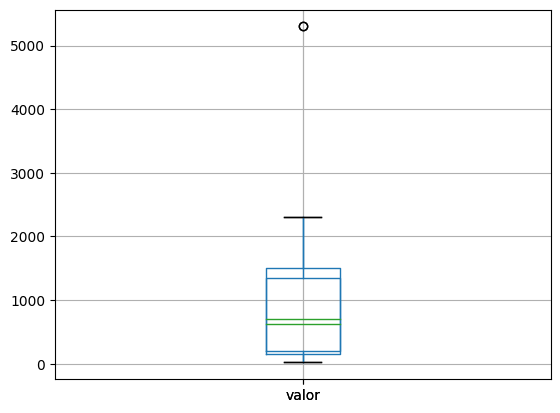

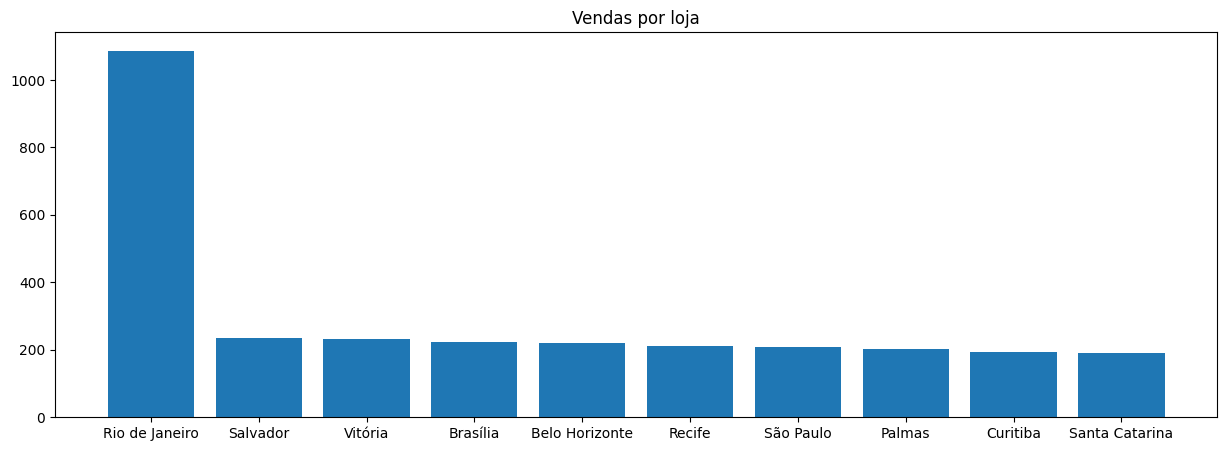

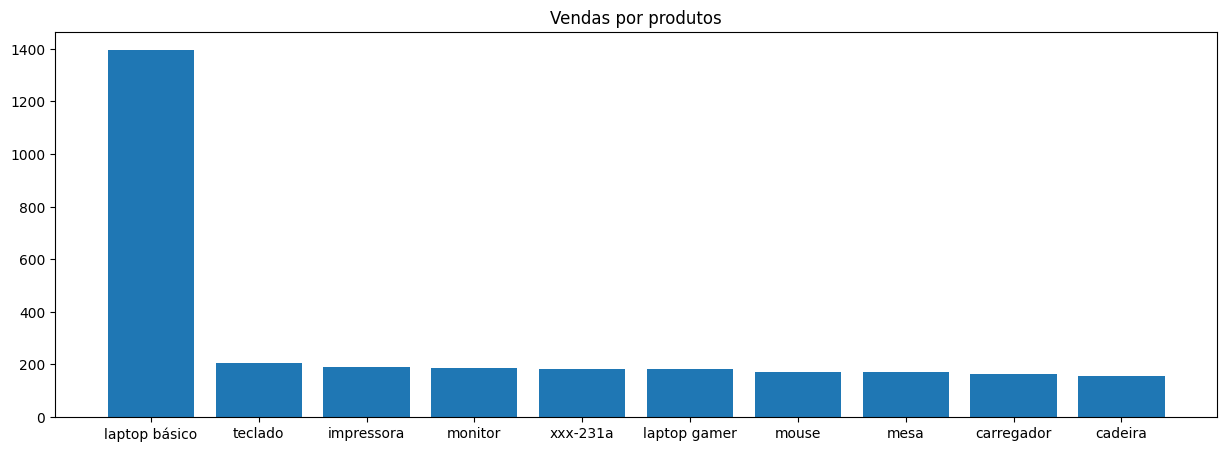

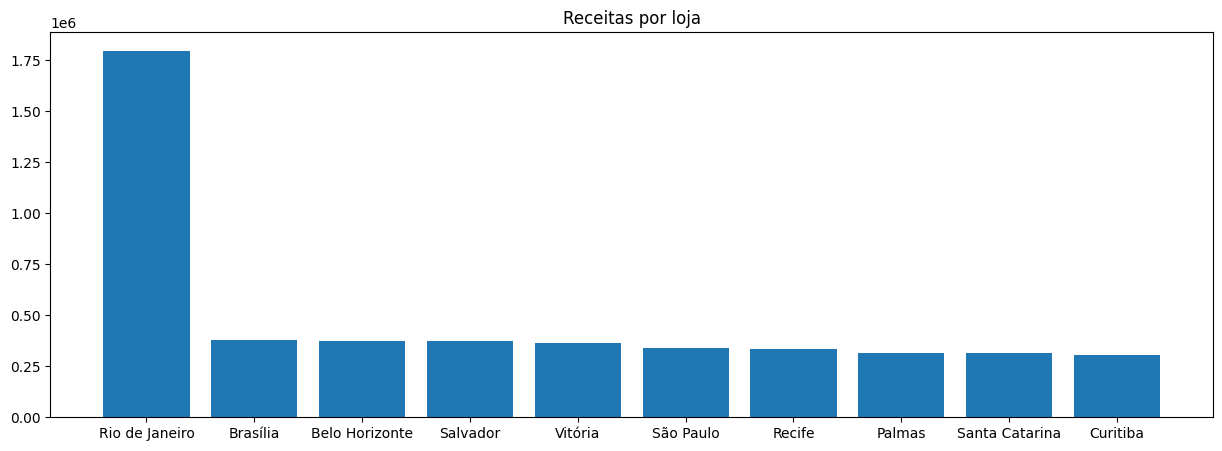

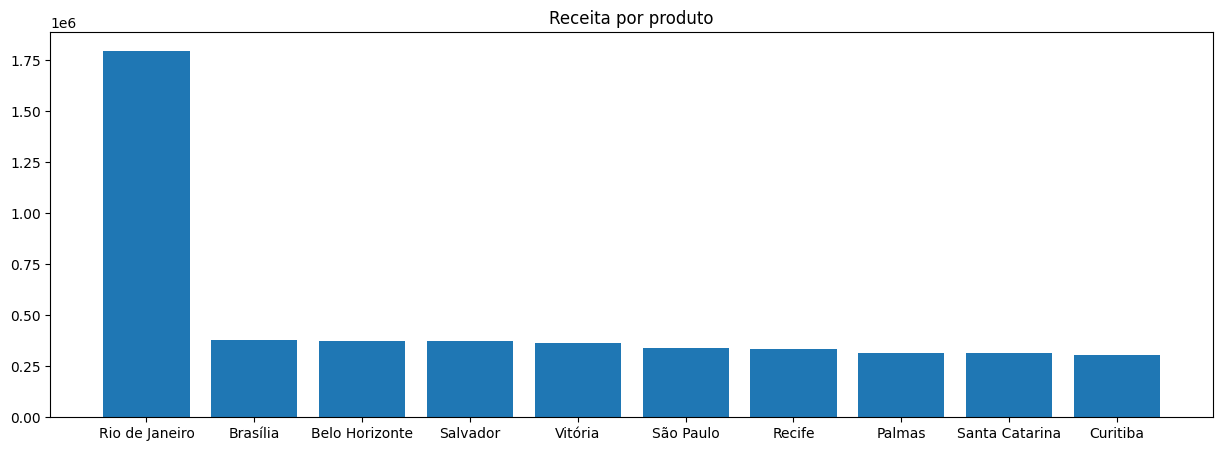

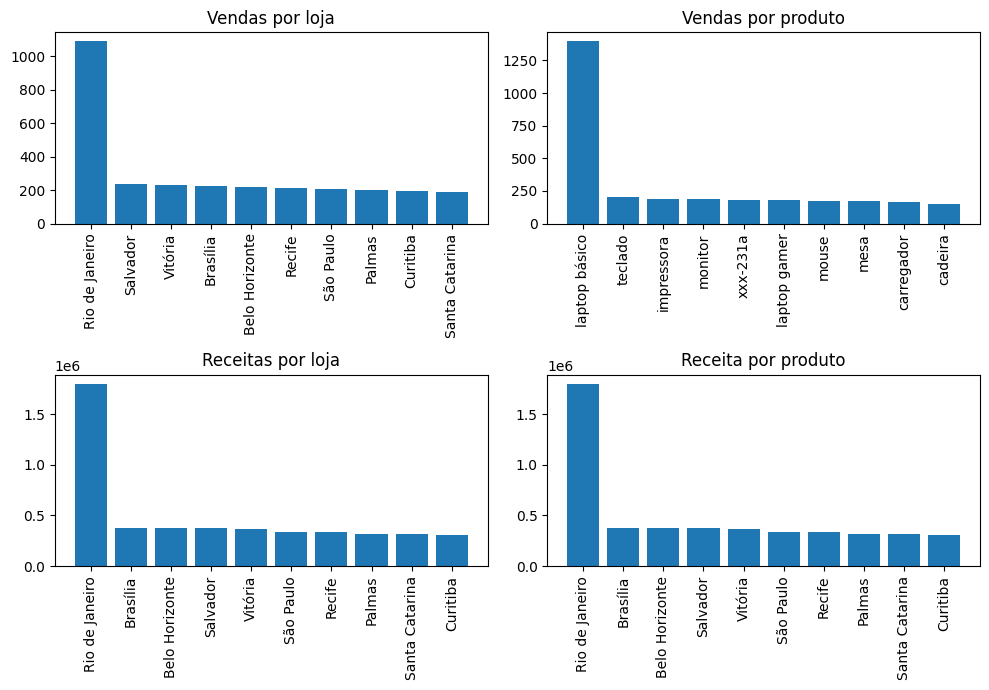

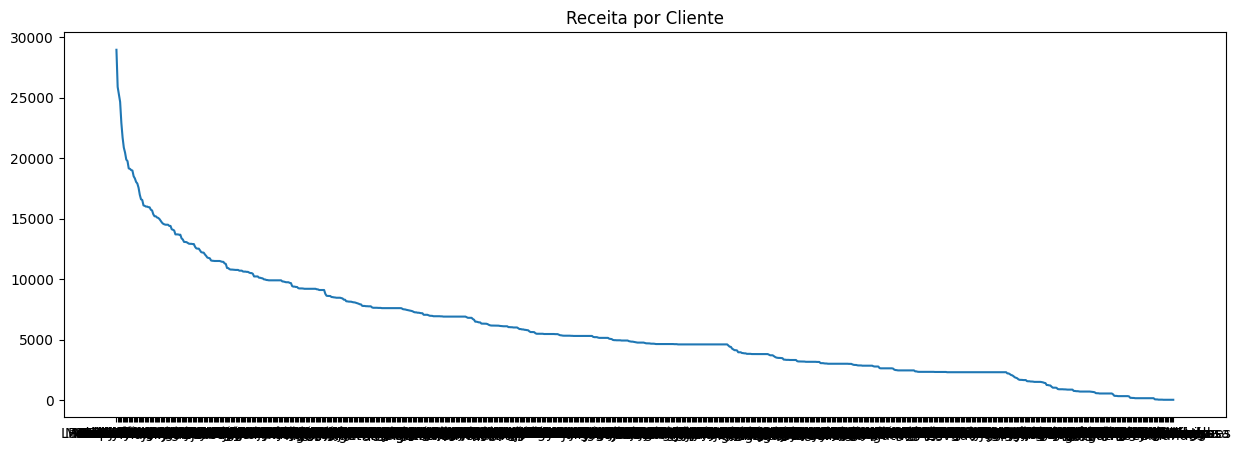

In [70]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Receita por Cliente')
plt.show()

In [71]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(graf_dados.index, graf_dados.values, color = 'C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color = 'C1')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.title('Receita por cliente')

Text(0.5, 1.0, 'Receita por cliente')

In [72]:
receita_acumulada = graf_dados.cumsum()/graf_dados.sum()
receita_acumulada[receita_acumulada<0.60].count()/receita_acumulada.count()

0.3170731707317073

## Pareto

In [73]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(graf_dados.index, graf_dados.values, color='C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.title('Pareto de receita por produto')

Text(0.5, 1.0, 'Pareto de receita por produto')

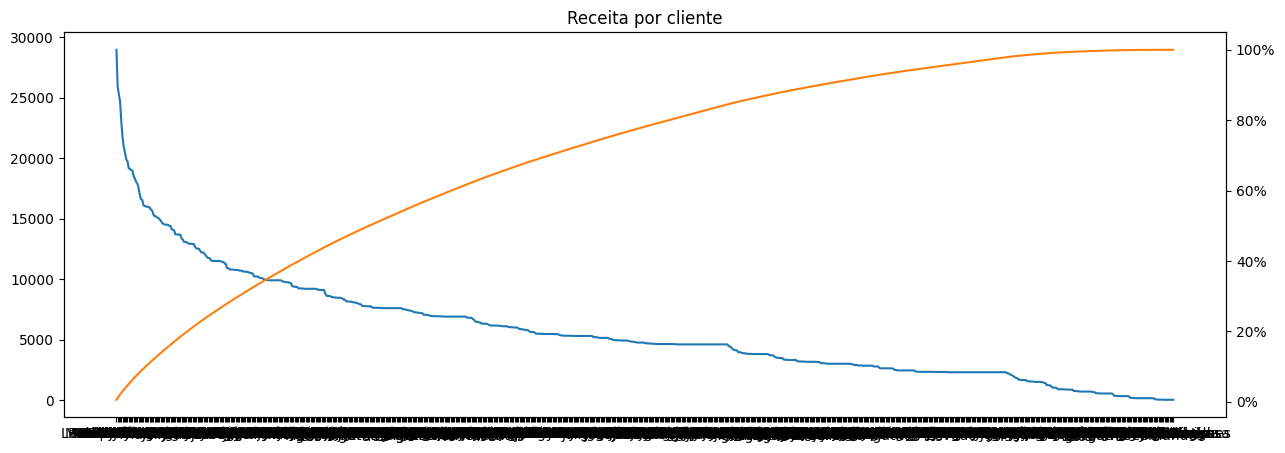

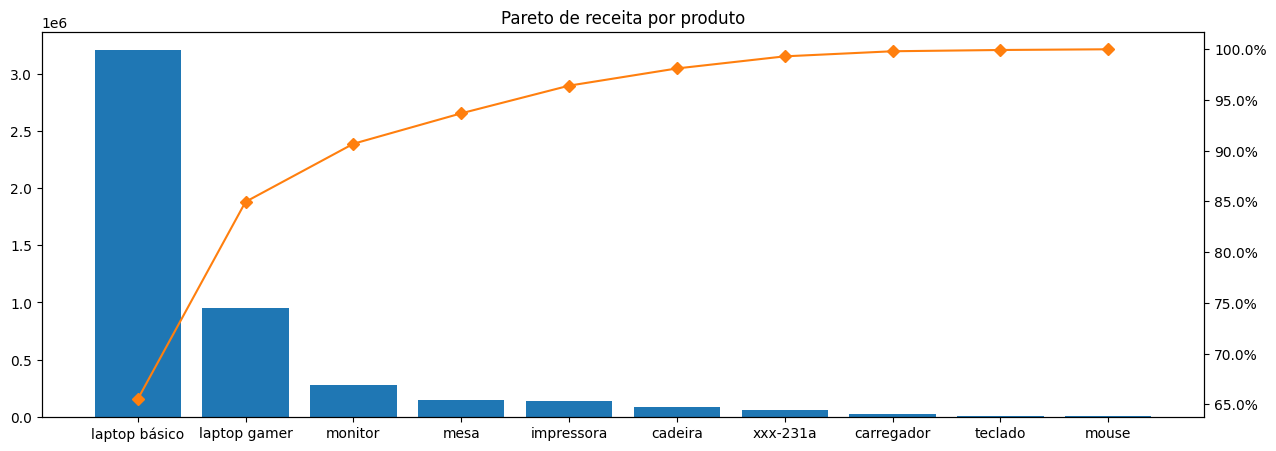

In [74]:
plt.show()

## Receita combinado produto-loja

In [75]:
graf_dados = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
for cidade in dflojas.cidade:
    for produto in dfprodutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'Loja' : [cidade],
            'Produto' : [produto],
            'Receita' : [df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()]
        }), graf_dados], ignore_index=True)
graf_dados

,Loja,Produto,Receita
0,Vitória,xxx-231a,7064.9744
1,Vitória,mesa,12040.0000
2,Vitória,cadeira,5400.0000
3,Vitória,carregador,2100.0000
4,Vitória,impressora,8400.0000
...,...,...,...
95,São Paulo,monitor,30000.0000
96,São Paulo,laptop gamer,63600.0000
97,São Paulo,laptop básico,223100.0000
98,São Paulo,teclado,510.0000


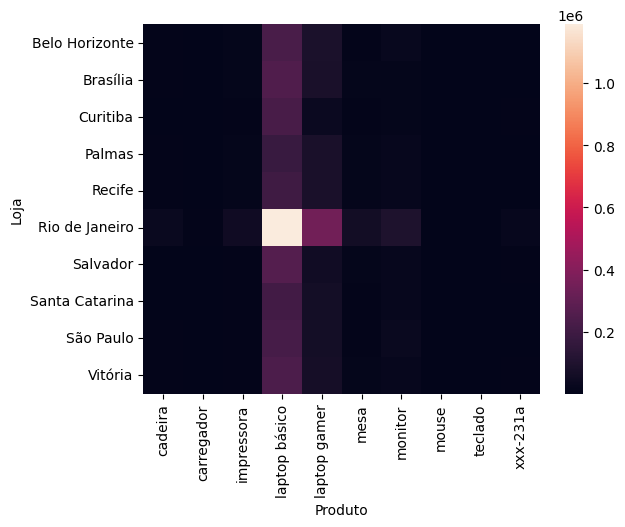

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
graf_dados = graf_dados.pivot_table(index='Loja', columns='Produto', values='Receita', aggfunc='sum')
sns.heatmap(graf_dados)
plt.show()

In [77]:
graf_dados

Produto,cadeira,carregador,impressora,laptop básico,laptop gamer,mesa,monitor,mouse,teclado,xxx-231a
Loja,,,,,,,,,,
Belo Horizonte,6480.0,1800.0,11200.0,232300.0,84800.0,9460.0,25500.0,200.0,450.0,3532.4872
Brasília,6480.0,1350.0,9800.0,250700.0,79500.0,12040.0,13500.0,220.0,540.0,3853.6224
Curitiba,4320.0,1500.0,6300.0,227700.0,37100.0,9460.0,10500.0,280.0,300.0,5780.4336
Palmas,7020.0,1650.0,14000.0,179400.0,79500.0,10320.0,19500.0,240.0,390.0,4817.0280
Recife,8100.0,1650.0,9800.0,195500.0,79500.0,11180.0,22500.0,180.0,660.0,3853.6224
Rio de Janeiro,30240.0,8700.0,50400.0,1189100.0,344500.0,56760.0,96000.0,1280.0,1980.0,18946.9768
Salvador,4320.0,2250.0,9100.0,264500.0,53000.0,13760.0,22500.0,220.0,450.0,5138.1632
Santa Catarina,4320.0,2100.0,7700.0,204700.0,63600.0,6020.0,21000.0,200.0,480.0,3211.3520
São Paulo,6480.0,1500.0,7000.0,223100.0,63600.0,6020.0,30000.0,300.0,510.0,2247.9464


In [78]:
graf_dados = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
for cidade in dflojas.cidade:
    for produto in dfprodutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'Loja' : [cidade],
            'Produto' : [produto],
            'Receita' : [df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()]
        }), graf_dados], ignore_index=True)
graf_dados = graf_dados.sort_values(by='Receita', ascending=False)
graf_dados

,Loja,Produto,Receita
87,Rio de Janeiro,laptop básico,1189100.0
86,Rio de Janeiro,laptop gamer,344500.0
37,Salvador,laptop básico,264500.0
27,Brasília,laptop básico,250700.0
7,Vitória,laptop básico,241500.0
...,...,...,...
29,Brasília,mouse,220.0
39,Salvador,mouse,220.0
59,Santa Catarina,mouse,200.0
69,Belo Horizonte,mouse,200.0


In [79]:
graf_dados['lojaprod'] = graf_dados.Loja + '-' + graf_dados.Produto
graf_dados

,Loja,Produto,Receita,lojaprod
87,Rio de Janeiro,laptop básico,1189100.0,Rio de Janeiro-laptop básico
86,Rio de Janeiro,laptop gamer,344500.0,Rio de Janeiro-laptop gamer
37,Salvador,laptop básico,264500.0,Salvador-laptop básico
27,Brasília,laptop básico,250700.0,Brasília-laptop básico
7,Vitória,laptop básico,241500.0,Vitória-laptop básico
...,...,...,...,...
29,Brasília,mouse,220.0,Brasília-mouse
39,Salvador,mouse,220.0,Salvador-mouse
59,Santa Catarina,mouse,200.0,Santa Catarina-mouse
69,Belo Horizonte,mouse,200.0,Belo Horizonte-mouse


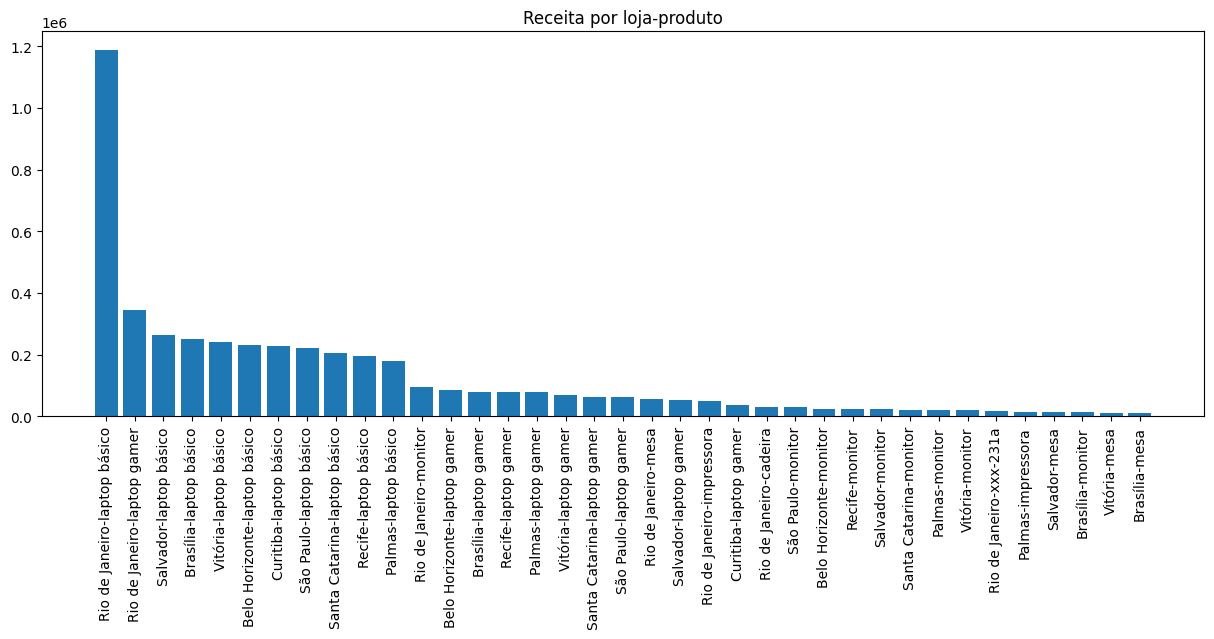

In [80]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.Receita>0.01*graf_dados.Receita.max()], graf_dados.Receita[graf_dados.Receita>0.01*graf_dados.Receita.max()])
plt.xticks(rotation=90)
plt.title('Receita por loja-produto')
plt.show()

## Análise de tempo

## Tempo médio de pagamento

In [81]:
df.tempo_pg.mean()

22.47200772200772

In [82]:
df.boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento')

Text(0.5, 1.0, 'Boxplot para tempo de pagamento')

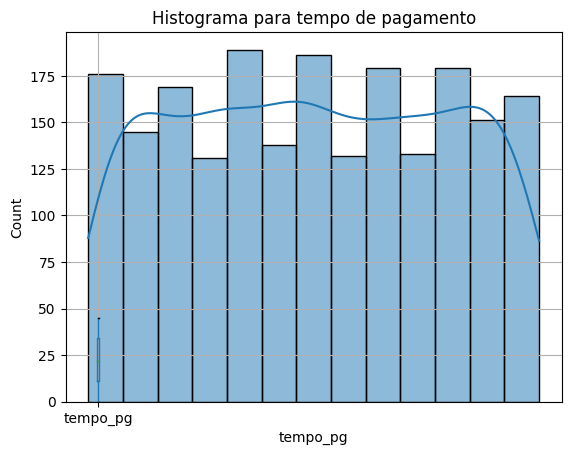

In [83]:
import seaborn as sns
sns.histplot(data=df.tempo_pg, kde=True)
plt.title('Histograma para tempo de pagamento')
plt.show()

In [84]:
df.tempo_pg.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pg, dtype: float64

## Tempo de pagamento por cidade e produto

In [85]:
df.groupby('loja_cidade').mean().tempo_pg

C:\Users\alcides.nogueira\AppData\Local\Temp\ipykernel_11760\3885032398.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('loja_cidade').mean().tempo_pg


loja_cidade
Belo Horizonte    21.430939
Brasília          22.269430
Curitiba          23.550898
Palmas            23.294444
Recife            22.301075
Rio de Janeiro    23.363855
Salvador          21.644860
Santa Catarina    19.769231
São Paulo         23.087432
Vitória           22.710660
Name: tempo_pg, dtype: float64

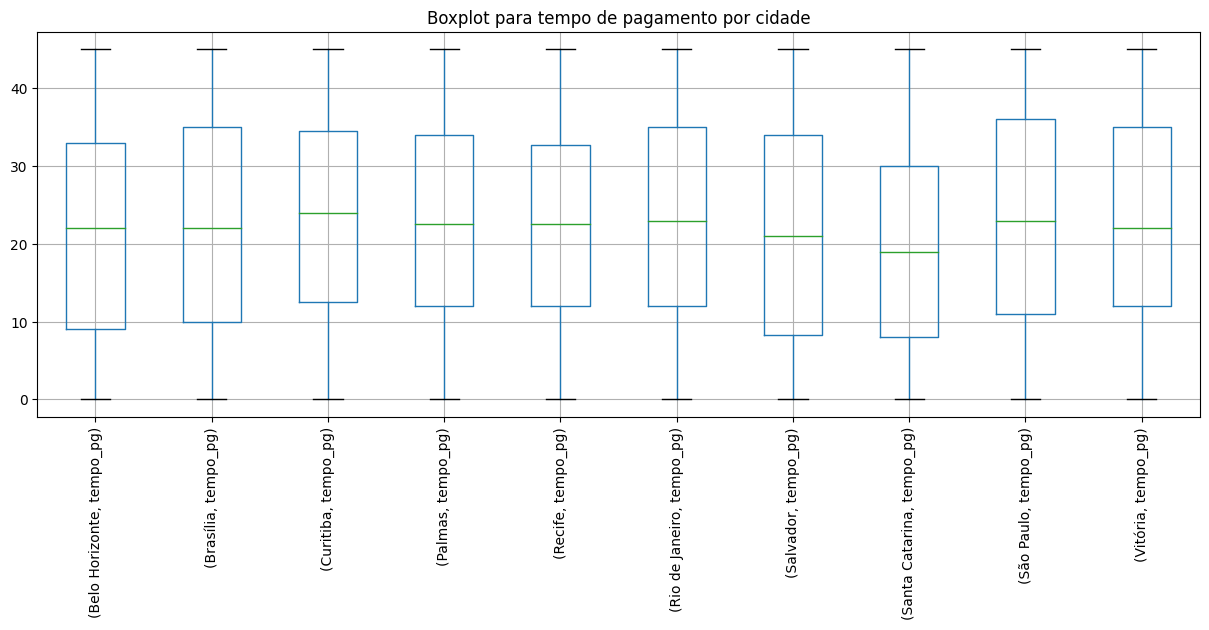

In [86]:
plt.figure(figsize=(15,5))
df[['loja_cidade', 'tempo_pg']].groupby('loja_cidade').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

In [87]:
df.groupby('produto_produto').tempo_pg.mean()

produto_produto
cadeira          23.734513
carregador       22.051724
impressora       21.383459
laptop básico    22.980513
laptop gamer     21.763889
mesa             20.300885
monitor          22.021277
mouse            22.912698
teclado          22.104575
xxx-231a         21.823077
Name: tempo_pg, dtype: float64

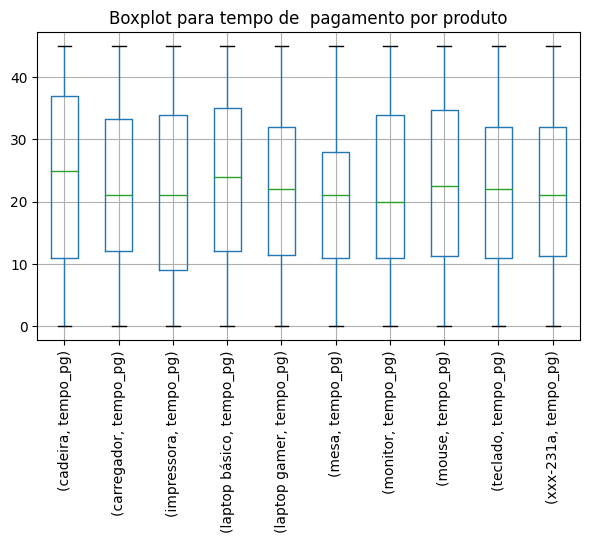

In [88]:
plt.figure(figsize=(7,4))
df[['produto_produto', 'tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Boxplot para tempo de  pagamento por produto')
plt.xticks(rotation=90)
plt.show()

In [89]:
graf_dados = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
graf_dados

,produto_valor
dt_venda,
2018-01-04,NaN
2018-01-05,NaN
2018-01-06,NaN
2018-01-07,NaN
2018-01-10,NaN
...,...
2020-09-20,7407.673893
2020-09-22,7635.302720
2020-09-24,7431.969387


In [90]:
promo = pd.read_csv('caso_estudo_venda_promocao.csv', sep=";")

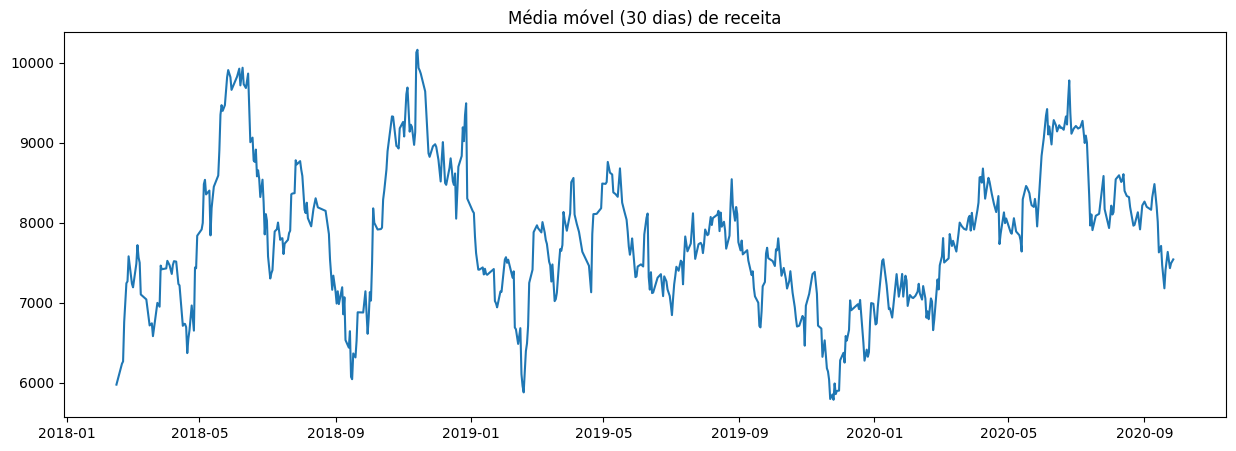

In [91]:
plt.figure(figsize=(15,5))
graf_dados = df[['produto_valor', 'dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Média móvel (30 dias) de receita')
plt.show()

In [92]:
dfPromo = pd.read_csv('caso_estudo_venda_promocao.csv', sep=";")
dfPromo = dfPromo.set_index('id_venda')
df = df.join(dfPromo)
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,promoção
id,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,73.0,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,51.0,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,60.0,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,81.0,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,81.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,23.0,0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,28.0,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,36.0,0


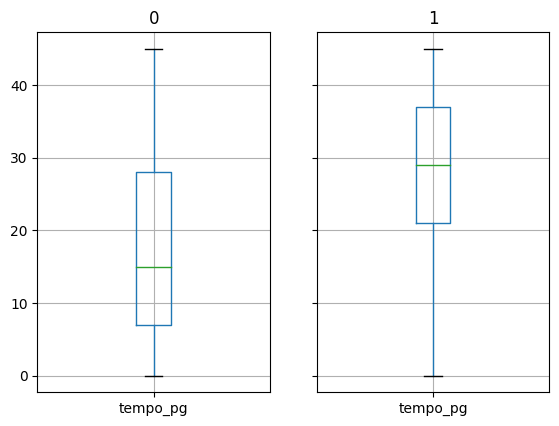

In [93]:
graf_dados = df[['promoção', 'tempo_pg']][~df.tempo_pg.isnull()]
graf_dados.groupby('promoção').boxplot(column=['tempo_pg'])
plt.show()

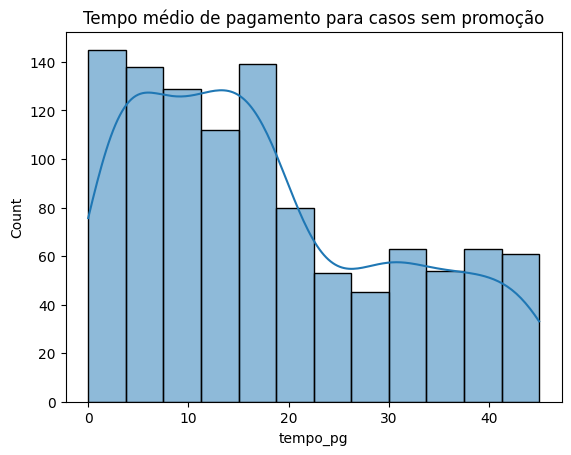

In [94]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==0], kde=True)
plt.title('Tempo médio de pagamento para casos sem promoção')
plt.show()

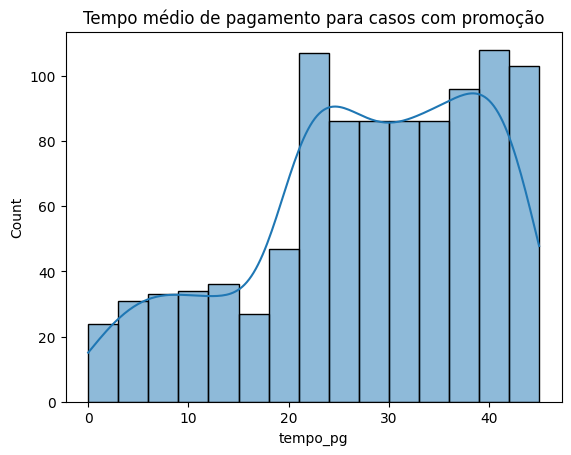

In [95]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==1], kde=True)
plt.title('Tempo médio de pagamento para casos com promoção')
plt.show()

## Análise de inadimplência

## Inadimplência por loja

C:\Users\alcides.nogueira\AppData\Local\Temp\ipykernel_11760\3144488173.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graf_dados = df.groupby('loja_cidade').mean().pg.sort_values(ascending=False)


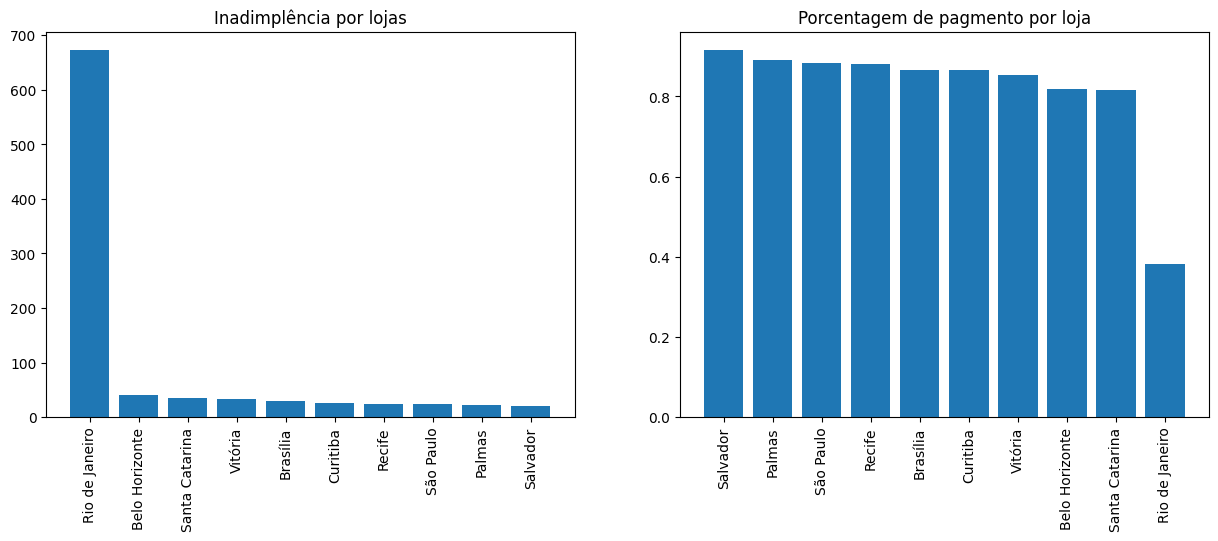

In [96]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Inadimplência por lojas')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados = df.groupby('loja_cidade').mean().pg.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagmento por loja')
plt.xticks(rotation=90)

plt.show()

In [97]:
graf_dados

loja_cidade
Salvador          0.914530
Palmas            0.891089
São Paulo         0.884058
Recife            0.881517
Brasília          0.865471
Curitiba          0.865285
Vitória           0.852814
Belo Horizonte    0.819005
Santa Catarina    0.816754
Rio de Janeiro    0.381785
Name: pg, dtype: float64

## Inadimplência por produto

C:\Users\alcides.nogueira\AppData\Local\Temp\ipykernel_11760\1353258812.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graf_dados = df.groupby('produto_produto').mean().pg.sort_values(ascending = False)


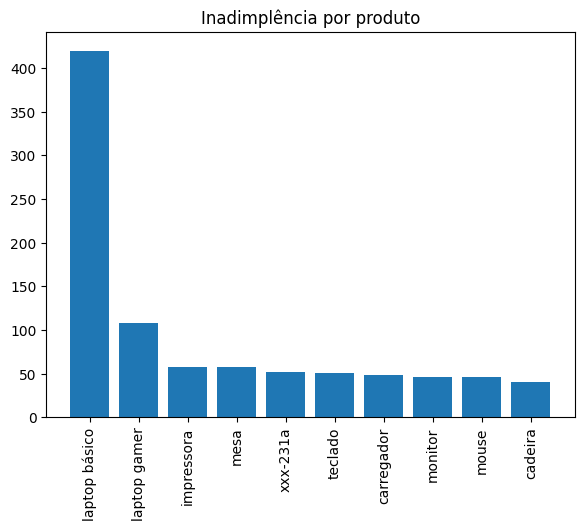

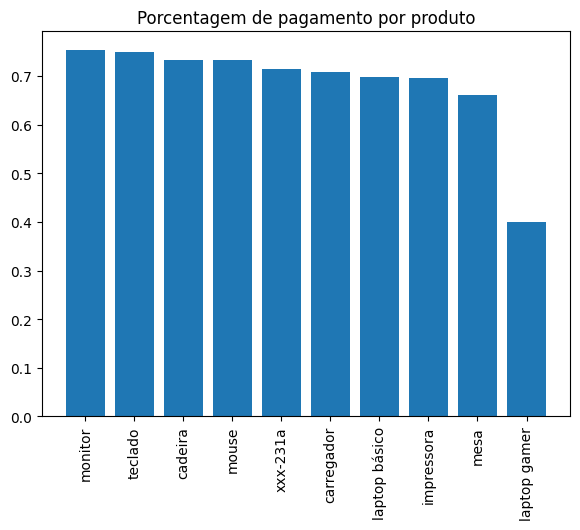

In [98]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Inadimplência por produto')

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
graf_dados = df.groupby('produto_produto').mean().pg.sort_values(ascending = False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Porcentagem de pagamento por produto')

plt.show()

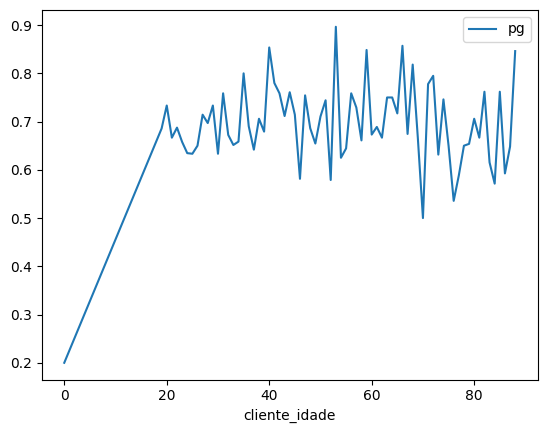

In [99]:
graf_dados = df[['cliente_idade', 'pg']].groupby('cliente_idade').mean().sort_values('cliente_idade')
graf_dados.plot()
plt.show()

In [100]:
df[df.cliente_idade<1]

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,promoção
id,,,,,,,,,,,,,,,
21,270,2,10,2018-01-12,sem nome,M,2023-01-01,Rio de Janeiro,xxx-231a,321.1352,NaT,0,NaN,0.0,0
1059,269,5,4,2018-12-15,sem nome,F,2023-01-01,Santa Catarina,laptop gamer,5300.0000,NaT,0,NaN,0.0,0
1745,269,9,3,2019-08-03,sem nome,F,2023-01-01,Palmas,laptop básico,2300.0000,2019-09-03,1,31.0,0.0,1
1900,269,2,3,2019-09-22,sem nome,F,2023-01-01,Rio de Janeiro,laptop básico,2300.0000,NaT,0,NaN,0.0,0
2370,277,10,3,2020-03-09,Brenda Santos,F,2023-01-01,Vitória,laptop básico,2300.0000,NaT,0,NaN,0.0,0


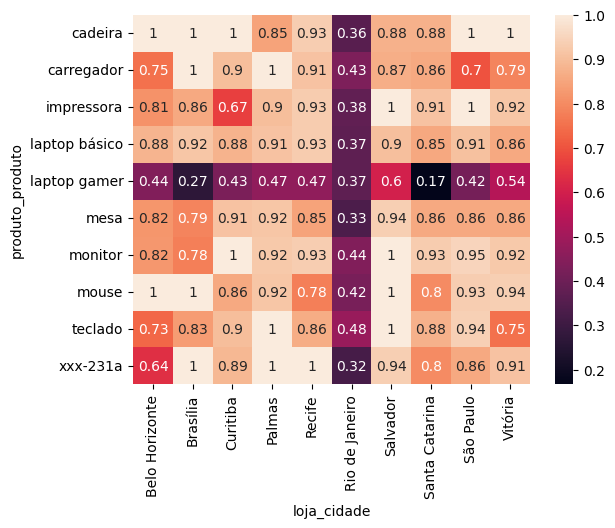

In [101]:
import seaborn as sns
graf_dados = df.pivot_table(index='produto_produto', columns='loja_cidade', values='pg', aggfunc='mean')
sns.heatmap(graf_dados, annot=True)
plt.show()

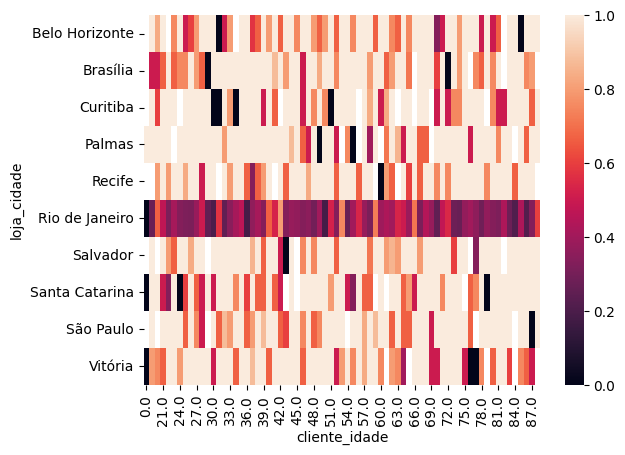

In [102]:
import seaborn as sns
graf_dados = df.pivot_table(index='loja_cidade', columns='cliente_idade', values='pg', aggfunc='mean')
sns.heatmap(graf_dados)
plt.show()

# Machine Learning

## Alvo

In [103]:
import copy
dfML = df[['cliente_sexo', 'loja_cidade', 'produto_produto', 'produto_valor', 'cliente_idade', 'promoção', 'pg']]
dfML = dfML.replace([' ', '-'],'_', regex=True)
dfML

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,2300.0,73.0,0,1
2,F,Palmas,laptop_básico,2300.0,51.0,1,1
3,M,Salvador,cadeira,540.0,60.0,1,1
4,M,Belo_Horizonte,laptop_básico,2300.0,81.0,0,0
5,M,Palmas,mouse,20.0,81.0,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,150.0,23.0,0,1
2997,F,Brasília,laptop_básico,2300.0,28.0,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,5300.0,36.0,0,0


## Normalização

In [104]:
dfML['produto_valor'] = dfML['produto_valor']/dfML['produto_valor'].max()
dfML['cliente_idade'] = dfML['cliente_idade']/dfML['cliente_idade'].max()
dfML

,cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,pg
id,,,,,,,
1,M,Palmas,laptop_básico,0.433962,0.829545,0,1
2,F,Palmas,laptop_básico,0.433962,0.579545,1,1
3,M,Salvador,cadeira,0.101887,0.681818,1,1
4,M,Belo_Horizonte,laptop_básico,0.433962,0.920455,0,0
5,M,Palmas,mouse,0.003774,0.920455,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,0.028302,0.261364,0,1
2997,F,Brasília,laptop_básico,0.433962,0.318182,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,1.000000,0.409091,0,0


## Dados categóricos

In [105]:
col_cat = ['cliente_sexo', 'loja_cidade', 'produto_produto', 'promoção']
dfML_dummies = pd.get_dummies(dfML[col_cat].astype(str), drop_first =False)
dfML_dummies

,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,loja_cidade_Rio_de_Janeiro,loja_cidade_Salvador,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [106]:
dfML = pd.concat([dfML, dfML_dummies], axis=1)
dfML = dfML.drop(col_cat, axis =1)
dfML

,produto_valor,cliente_idade,pg,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0.433962,0.829545,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.433962,0.579545,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0.101887,0.681818,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.433962,0.920455,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0.003774,0.920455,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.028302,0.261364,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2997,0.433962,0.318182,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,1.000000,0.409091,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Dados de treinamento e de teste

In [107]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc

y = dfML.pg
x = dfML.drop(['pg'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_new = x.loc[[2997, 2998]]
x_new

,produto_valor,cliente_idade,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
2997,0.433962,0.318182,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,1.000000,0.409091,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Regressão Logística

In [108]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

all_col_with_plus = ' + '.join(dfML.drop(['pg'], axis=1).columns)
modelo = smf.glm(formula='pg ~ ' + all_col_with_plus, data=dfML,
                 family= sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     pg   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2977
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.6
Date:                Mon, 13 Mar 2023   Deviance:                       2677.1
Time:                        08:07:02   Pearson chi2:                 3.01e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2916
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [109]:
model = LogisticRegression(penalty='none', solver='newton-cg')
model.fit(x_train, y_train)

print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(x_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(x)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(x_test)))

- Matriz de Confusão
[[180 115]
 [ 76 529]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       928
           1       0.83      0.89      0.86      2072

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.80      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       295
           1       0.82      0.87      0.85       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



C:\Users\alcides.nogueira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [110]:
model.predict(x_new)

array([1, 0], dtype=int64)

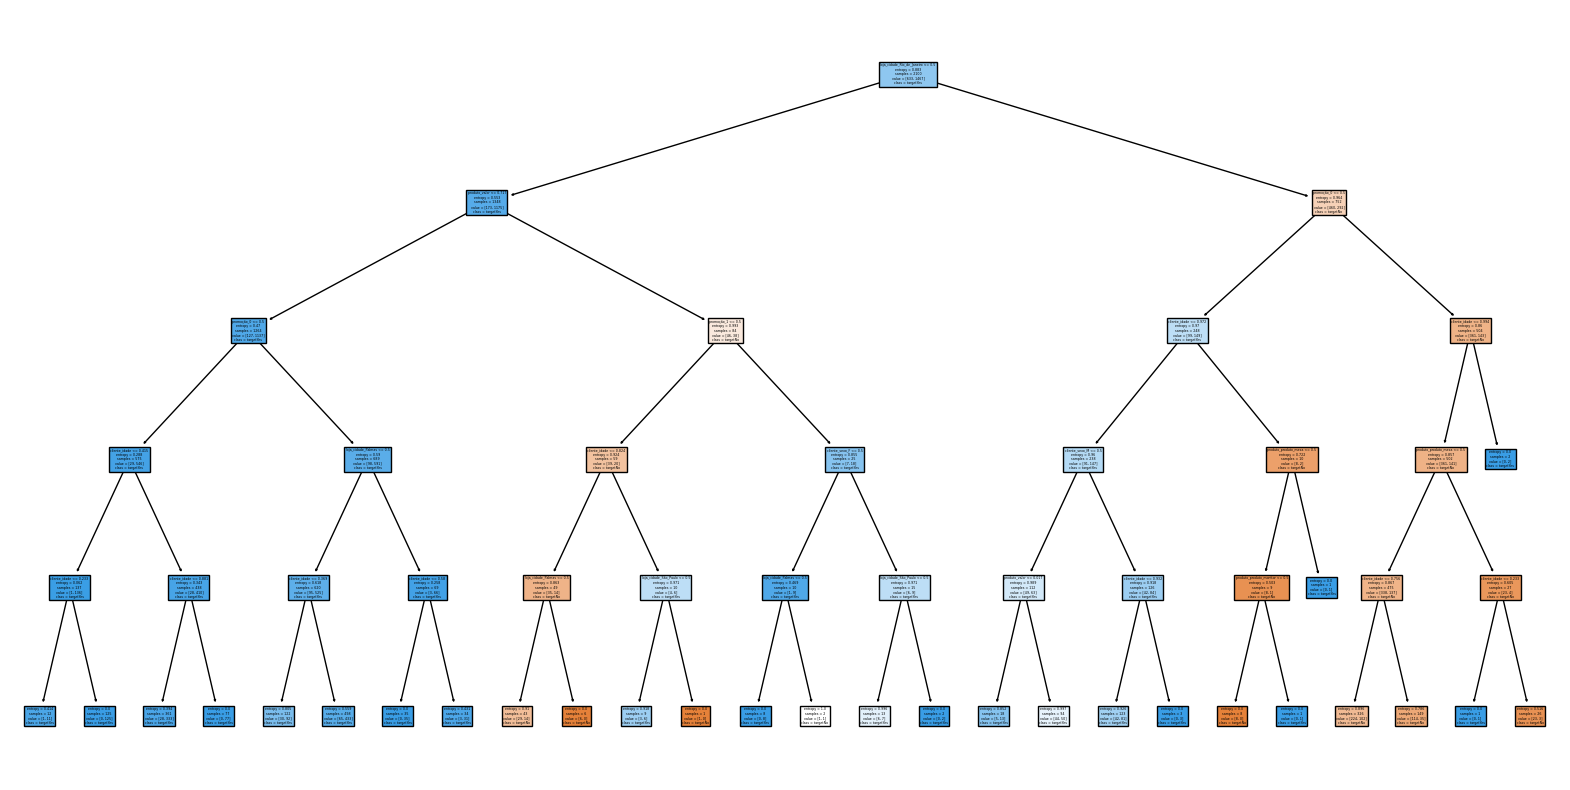

In [111]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = model.fit(x_train,y_train)
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model,
                   feature_names=x.columns,
                   class_names=['targetNo','targetYes'],
                   filled=True)
plt.show()

In [112]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(x_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(x)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(x_test)))

- Matriz de Confusão
[[189 106]
 [ 75 530]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       928
           1       0.85      0.89      0.87      2072

    accuracy                           0.81      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.81      0.81      0.81      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       295
           1       0.83      0.88      0.85       605

    accuracy                           0.80       900
   macro avg       0.77      0.76      0.77       900
weighted avg       0.79      0.80      0.80       900



In [113]:
model.predict(x_new)

array([1, 0], dtype=int64)

In [114]:
x_new

,produto_valor,cliente_idade,cliente_sexo_F,cliente_sexo_M,cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx_231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
2997,0.433962,0.318182,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,1.000000,0.409091,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [115]:
df.loc[x_new.index]

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade,promoção
id,,,,,,,,,,,,,,,
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,28.0,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,36.0,0


## Redes Neurais

In [116]:
from keras import Sequential
from keras.layers import Dense
import keras
import tensorflow
tensorflow.random.set_seed(2)

model = Sequential()
model.add(Dense(15, activation='relu', kernel_initializer='random_normal', input_dim=len(x.columns)))
model.add(Dense(7, activation='relu', kernel_initializer='random_normal', input_dim=len(x.columns)))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal', input_dim=len(x.columns)))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal', input_dim=len(x.columns)))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [117]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=300, verbose=False)

In [118]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, np.argmax(model.predict(x_test), axis=1)))
print('\n- Reporte completo')
print(classification_report(y, np.argmax(model.predict(x), axis=1)))
print('\n- Reporte teste')
print(classification_report(y_test, np.argmax(model.predict(x_test))))

- Matriz de Confusão
29/29 [==============================] - 0s 3ms/step
[[295   0]
 [605   0]]

- Reporte completo
94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.31      1.00      0.47       928
           1       0.00      0.00      0.00      2072

    accuracy                           0.31      3000
   macro avg       0.15      0.50      0.24      3000
weighted avg       0.10      0.31      0.15      3000


- Reporte teste
29/29 [==============================] - 0s 2ms/step


C:\Users\alcides.nogueira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alcides.nogueira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alcides.nogueira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

TypeError: Singleton array 194 cannot be considered a valid collection.

## XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

In [120]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, np.argmax(model.predict(x_test), axis=1)))
print('\n- Reporte completo')
print(classification_report(y, np.argmax(model.predict(x), axis=1)))
print('\n- Reporte teste')
print(classification_report(y_test, np.argmax(model.predict(x_test))))

- Matriz de Confusão
29/29 [==============================] - 0s 2ms/step
[[295   0]
 [605   0]]

- Reporte completo
94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.31      1.00      0.47       928
           1       0.00      0.00      0.00      2072

    accuracy                           0.31      3000
   macro avg       0.15      0.50      0.24      3000
weighted avg       0.10      0.31      0.15      3000


- Reporte teste
29/29 [==============================] - 0s 2ms/step


C:\Users\alcides.nogueira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alcides.nogueira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alcides.nogueira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

TypeError: Singleton array 194 cannot be considered a valid collection.